# preparation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = 10, 8

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI・データサイエンス実践プログラム/機械学習1/diabetes_train.csv')
df.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.012648,0.050680,0.000261,-0.011409,0.039710,0.057245,-0.039719,0.056081,0.024053,0.032059,259.0
1,-0.027310,-0.044642,-0.066563,-0.112400,-0.049727,-0.041397,0.000779,-0.039493,-0.035817,-0.009362,77.0
2,0.005383,-0.044642,0.059541,-0.056166,0.024574,0.052861,-0.043401,0.050914,-0.004220,-0.030072,91.0


In [7]:
t = df['target'].values
x = df.drop(labels = ['target'], axis = 1).values

In [8]:
type(x), x.shape, type(t), t.shape

(numpy.ndarray, (309, 10), numpy.ndarray, (309,))

# Split

In [9]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size = 0.2, random_state = 0)

In [13]:
x_train.shape, x_test.shape, t_train.shape, t_test.shape

((247, 10), (62, 10), (247,), (62,))

# Training

In [14]:
# モデル定義
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [15]:
# 学習
model.fit(x_train, t_train)

LinearRegression()

In [16]:
# 重み
model.coef_

array([ -11.77527358, -248.00193578,  629.12353242,  351.6765064 ,
       -439.40708263,  118.17992383,  -13.50495926,  195.95606592,
        662.18589315,  -33.54558853])

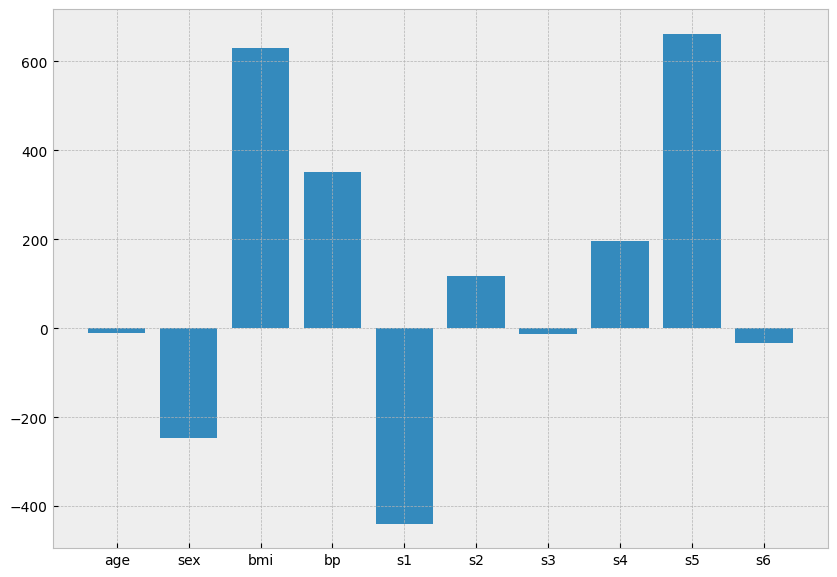

In [22]:
# 可視化
columns = df.columns.tolist()[:-1]
plt.figure(figsize = (10, 7))
plt.bar(x=columns, height = model.coef_);

In [23]:
# バイアス
model.intercept_

152.6649505528991

# Validation

In [24]:
# 決定係数 1に近づけば良い　1以下の範囲
print('train score: ', model.score(x_train, t_train))
print('test score: ', model.score(x_test, t_test))

train score:  0.5560624696989096
test score:  0.516732367287052


# Inference

In [26]:
y = model.predict(x_test)
print('予測値', y[0])
print('目標値', t_test[0])

予測値 78.27231107773727
目標値 65.0


# Problem

In [33]:
d_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI・データサイエンス実践プログラム/機械学習1/diabetes_train.csv')
d_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI・データサイエンス実践プログラム/機械学習1/diabetes_test.csv')
x_train = d_train.drop('target', axis = 1).values
t_train = d_train['target']
x_test = d_test

In [34]:
model = LinearRegression()
model.fit(x_train, t_train)

LinearRegression()

In [36]:
model.coef_

array([ -52.46990775, -193.51064552,  579.4827762 ,  272.46404234,
       -504.72401371,  241.68441866,  -69.73618783,   86.62018451,
        721.95580222,   26.77887028])

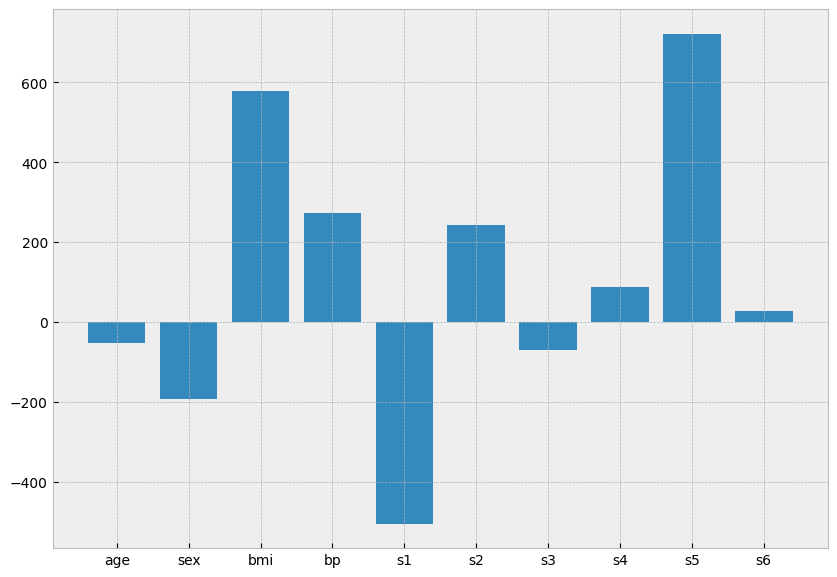

In [38]:
columns = d_train.columns.tolist()[:-1]
plt.figure(figsize = (10, 7))
plt.bar(x = columns, height = model.coef_);

In [39]:
model.intercept_

153.71914540545853

In [50]:
result_df = pd.DataFrame(index = d_train.drop('target', axis = 1).columns, columns = ['weight'], data = model.coef_)

In [54]:
result_df['weight'].sort_values(ascending = False)

s5     721.955802
bmi    579.482776
bp     272.464042
s2     241.684419
s4      86.620185
s6      26.778870
age    -52.469908
s3     -69.736188
sex   -193.510646
s1    -504.724014
Name: weight, dtype: float64

In [57]:
predict = model.predict(x_test)

In [59]:
sub = pd.Series(predict, name = 'pred').to_csv('/content/drive/MyDrive/Colab Notebooks/AI・データサイエンス実践プログラム/機械学習1/sub.csv', index = None)